### 1.Возьмите датасет Mortality and Water Hardness
Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
df = pd.read_csv('database/water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


### 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

* location - местоположение
* town - город
* mortality - смертность
* hardness - твердость воды

Text(0.5, 1.0, 'Зависимость смертности от жесткости воды')

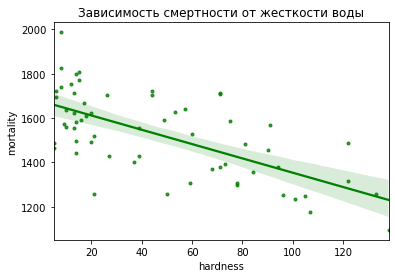

In [4]:
# Строим точечный график
sns.regplot(data=df, x='hardness', y='mortality', color='green', marker='.')
plt.title('Зависимость смертности от жесткости воды')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

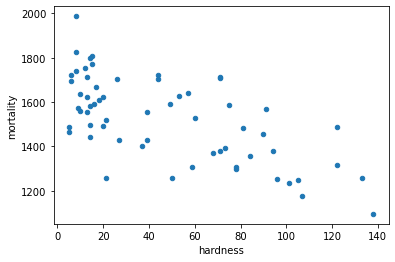

In [5]:
df.plot(kind='scatter', x='hardness', y='mortality')

Смертность выше в городах, где вода менее жесткая

In [6]:
# Коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Наблюдается зависимость смертности от жесткости воды (но в сторону ее смягчения)

In [7]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [8]:
# Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = df[['hardness']]
y = df['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [12]:
X_train.shape

(42, 1)

In [13]:
y_train.shape

(42,)

In [14]:
# метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-3.0493441])

In [16]:
model.intercept_

1679.9264716307484

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1631.13696606, 1597.59418098, 1463.42304067, 1634.18631016,
       1643.33434245, 1664.67975114, 1274.3637066 , 1432.92959969,
       1661.63040704, 1655.53171885, 1625.03827787, 1457.32435248,
       1600.64352508, 1371.94271773, 1500.01516985, 1637.23565426,
       1451.22566428, 1442.07763199, 1387.18943822])

In [18]:
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
26,16,1631.136966,1591
35,27,1597.594181,1427
60,71,1463.423041,1378
28,15,1634.186310,1772
11,12,1643.334342,1755
2,5,1664.679751,1466
34,133,1274.363707,1259
59,81,1432.929600,1485
40,6,1661.630407,1696
22,8,1655.531719,1742


In [19]:
# Рассчитать коэффициент детерминации
# метод возвращает значение коэффициента детерминации
model.score(X_test, y_test)

0.5305131271695874

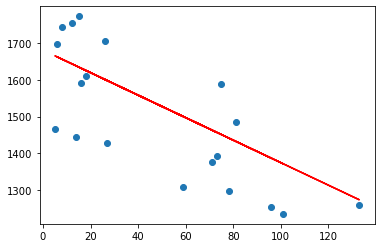

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [21]:
import matplotlib.pyplot as plt

In [22]:
# Вывести график остатков

In [63]:
residuals = y_test-y_pred

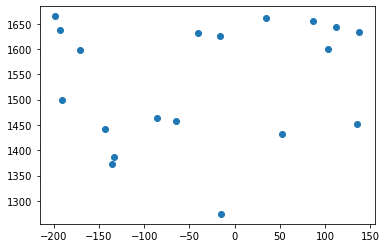

In [64]:
plt.scatter(residuals, y_pred)
plt.show()

### 3. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [27]:
# Разделяем данные на 2 группы
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [28]:
# Разделяем на 2 датафрейма с условием северный или южный город
loc_ = df['location'] == 'South'

In [29]:
loc_

0      True
1     False
2      True
3     False
4     False
      ...  
56     True
57     True
58     True
59     True
60    False
Name: location, Length: 61, dtype: bool

In [30]:
df_s, df_n = df[loc_], df[~loc_]

In [31]:
df_n

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


Text(0.5, 1.0, 'Зависимость смертности от жесткости воды/ Северные города')

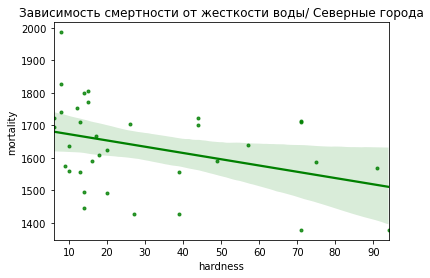

In [32]:
# Строим зависимости
# Строим точечный график для северных городов
sns.regplot(data=df_n, x='hardness', y='mortality', color='green', marker='.')
plt.title('Зависимость смертности от жесткости воды/ Северные города')

Text(0.5, 1.0, 'Зависимость смертности от жесткости воды/ Южные города')

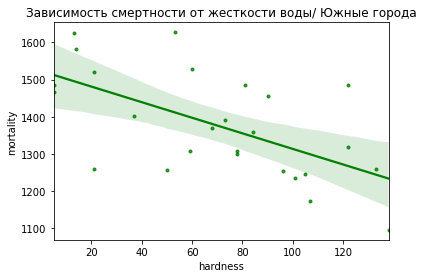

In [33]:
# Строим точечный график для южных городов
sns.regplot(data=df_s, x='hardness', y='mortality', color='green', marker='.')
plt.title('Зависимость смертности от жесткости воды/ Южные города')

В северных городах вода мягче, чем в южных; смерность выше.

In [34]:
# Коэффициент корреляции Пирсона для северных городов
df_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [35]:
# Коэффициент корреляции Пирсона для южных городов
df_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


Зависимость в северных городах меньше, чем в южных

In [36]:
# Коэффициент корреляции Спирмена для северных городов
df_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [37]:
# Коэффициент корреляции Спирмена для южных городов
df_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [38]:
# Построить модель линейной регрессии для северных городов
X1 = df_n[['hardness']]
y1 = df_n['mortality']

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=0)

In [40]:
X1_train.shape

(24, 1)

In [41]:
y1_train.shape

(24,)

In [42]:
# метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [43]:
model.coef_

array([-2.19897305])

In [44]:
model.intercept_

1707.8894952942032

In [45]:
y1_pred = model.predict(X1_test)
y1_pred

array([1551.76240871, 1648.51722293, 1674.90489954, 1542.96651651,
       1694.69565699, 1672.70592649, 1611.13468107, 1668.30798039,
       1501.18602855, 1677.10387259, 1600.13981582])

In [46]:
res_df_n = X1_test.copy()

res_df_n['y1_pred'] = y1_pred
res_df_n['y1_test'] = y1_test
res_df_n

,hardness,y1_pred,y1_test
50,71,1551.762409,1713
35,27,1648.517223,1427
28,15,1674.904900,1772
49,75,1542.966517,1587
40,6,1694.695657,1696
26,16,1672.705926,1591
20,44,1611.134681,1723
4,18,1668.307980,1609
21,94,1501.186029,1379
46,14,1677.103873,1495


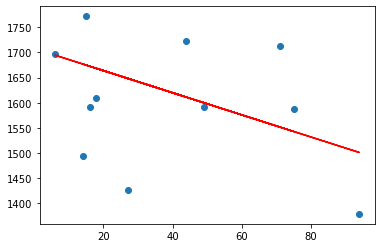

In [47]:
# Рассчитать коэффициент детерминации
model.score(X1_test, y1_test)

plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r')

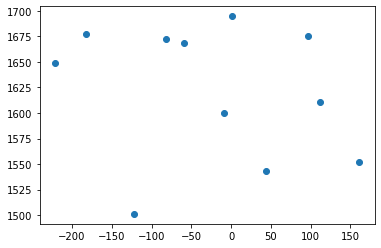

In [65]:
# Остатки
residuals1 = y1_test-y1_pred
plt.scatter(residuals1, y1_pred)
plt.show()

In [49]:
# Построить модель линейной регрессии для южных городов
X2 = df_s[['hardness']]
y2 = df_s['mortality']

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=0)

In [51]:
X2_train.shape

(18, 1)

In [52]:
y2_train.shape

(18,)

In [53]:
# метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [54]:
model.coef_

array([-2.25813343])

In [55]:
model.intercept_

1537.3866436225371

In [56]:
y2_pred = model.predict(X2_test)
y2_pred

array([1361.25223643, 1424.47997235, 1237.05489803, 1334.15463533,
       1489.96584169, 1453.83570688, 1401.89863809, 1404.15677152])

In [57]:
res_df_s = X2_test.copy()

res_df_s['y2_pred'] = y2_pred
res_df_s['y2_test'] = y2_test
res_df_s

,hardness,y2_pred,y2_test
7,78,1361.252236,1299
48,50,1424.479972,1257
34,133,1237.054898,1259
39,90,1334.154635,1456
12,21,1489.965842,1519
27,37,1453.835707,1402
56,60,1401.898638,1527
33,59,1404.156772,1309


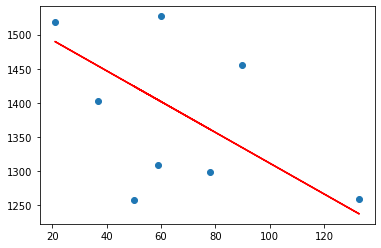

In [58]:
# Рассчитать коэффициент детерминации
model.score(X2_test, y2_test)

plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')

In [61]:
residuals2 = y2_test-y2_pred

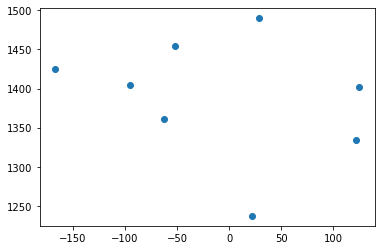

In [62]:
plt.scatter(residuals2, y2_pred)
plt.show()